In [50]:
import pandas as pd
import os

In [51]:
initial_inspection = pd.read_csv("C:\\Users\\Sulekha\\\OneDrive\Documents\\keith g\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv", index_col=[0])

In [52]:
initial_inspection.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [53]:
initial_inspection.shape

(18383, 5)

In [54]:
# Set the path and file name for the output file

output_file_path = "C:\\Users\\Sulekha\\\OneDrive\Documents\\keith g\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\all_data.csv"

# Check if the output file already exists
if not os.path.exists(output_file_path):
    # Get the list of files in the directory
    files = [file for file in os.listdir("C:\\Users\\Sulekha\\\OneDrive\Documents\\keith g\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\")]
    
    all_months_data = pd.DataFrame()
    for file in files:
        df = pd.read_csv("C:\\Users\\Sulekha\\\OneDrive\Documents\\keith g\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"+file, low_memory=False)
        all_months_data = pd.concat([all_months_data, df])
    
    # Save the concatenated data to the output file
    all_months_data.to_csv(output_file_path, index=False)
else:
    print("The file 'all_data.csv' already exists. Skipping the process.")

The file 'all_data.csv' already exists. Skipping the process.


In [55]:
all_data=pd.read_csv("C:\\Users\\Sulekha\\\OneDrive\Documents\\keith g\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## New Shape


In [56]:
all_data.shape

(186850, 6)

# DATA CLEANING

In [57]:
column_mapping = {
    'Order ID': 'order_id',
    'Product': 'product',
    'Quantity Ordered': 'quantity_ordered',
    'Price Each': 'price_each',
    'Order Date': 'order_date',
    'Purchase Address': 'purchase_address',
    
}

# Rename the columns using the mapping dictionary
all_data = all_data.rename(columns=column_mapping)

## *checked for missing values*

In [58]:
# check for missing values
print(all_data.isnull().sum())

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64


In [59]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


## *Removed rows with no NaN values*

In [60]:
all_data = all_data.dropna()
all_data.head()


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## *checked again for missing values*

In [61]:

print(all_data.isnull().sum())

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64


## Inspecting data types

In [62]:
all_data.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

In [63]:
all_data['quantity_ordered'] = pd.to_numeric(all_data['quantity_ordered'], errors='coerce')

In [64]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          186305 non-null  object 
 1   product           186305 non-null  object 
 2   quantity_ordered  185950 non-null  float64
 3   price_each        186305 non-null  object 
 4   order_date        186305 non-null  object 
 5   purchase_address  186305 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.9+ MB


In [65]:
non_numeric_values = all_data.iloc[:, 2].apply(lambda x: isinstance(x, str) and not str(2).isnumeric())
print(non_numeric_values.any())


False


In [66]:
import numpy as np
column_index = 2  # Replace with the desired column index
is_non_finite = ~np.isfinite(all_data.iloc[:, column_index])

# Get rows with non-finite values
rows_with_non_finite = all_data[is_non_finite]

# Print the rows with non-finite values
rows_with_non_finite

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
1149,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
1155,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
2878,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
2893,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
185551,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
186563,Order ID,Product,NaN,Price Each,Order Date,Purchase Address
186632,Order ID,Product,NaN,Price Each,Order Date,Purchase Address


In [67]:
column_index = 2  # Replace with the desired column index
is_non_finite = ~np.isfinite(all_data.iloc[:, column_index])

# Drop rows with non-finite values
all_data = all_data[~is_non_finite]


In [68]:
all_data.iloc[:, 2] = all_data.iloc[:, 2].astype('int64')

In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185950 non-null  object
 1   product           185950 non-null  object
 2   quantity_ordered  185950 non-null  int64 
 3   price_each        185950 non-null  object
 4   order_date        185950 non-null  object
 5   purchase_address  185950 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.9+ MB


In [70]:
all_data['price_each'] = pd.to_numeric(all_data['price_each'], errors='coerce')

## Add month column

In [71]:
all_data['month']=all_data['order_date'].str[0:2]

all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## *Removed all the rows which contained the word 'Or' in the column Month*

In [72]:
all_data = all_data[all_data['month'] != 'Or']

In [73]:
all_data['month'] = pd.to_numeric(all_data['month'])

## Add a sales column

In [74]:
all_data['sales']=all_data['quantity_ordered']*all_data['price_each']
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## get city name

In [75]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['city'] = all_data['purchase_address'].apply(lambda x: f"{get_city(x)} ({get_state(x)}) ")
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [76]:
all_data['order_date'] = pd.to_datetime(all_data['order_date'])
all_data['date'] = all_data['order_date'].dt.date
all_data['time'] = all_data['order_date'].dt.time

In [77]:
df_modified = all_data.reset_index(drop=True)

In [78]:
del df_modified['order_date']


In [79]:
del df_modified['purchase_address']


In [80]:
df_modified

,order_id,product,quantity_ordered,price_each,month,sales,city,date,time
0,176558,USB-C Charging Cable,2,11.95,4,23.90,Dallas (TX),2019-04-19,08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,4,99.99,Boston (MA),2019-04-07,22:30:00
2,176560,Google Phone,1,600.00,4,600.00,Los Angeles (CA),2019-04-12,14:38:00
3,176560,Wired Headphones,1,11.99,4,11.99,Los Angeles (CA),2019-04-12,14:38:00
4,176561,Wired Headphones,1,11.99,4,11.99,Los Angeles (CA),2019-04-30,09:27:00
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,9,8.97,Los Angeles (CA),2019-09-17,20:56:00
185946,259354,iPhone,1,700.00,9,700.00,San Francisco (CA),2019-09-01,16:00:00
185947,259355,iPhone,1,700.00,9,700.00,San Francisco (CA),2019-09-23,07:39:00
185948,259356,34in Ultrawide Monitor,1,379.99,9,379.99,San Francisco (CA),2019-09-19,17:30:00


## 1. What are the top-selling products in terms of quantity_ordered and sales?


In [81]:
top_selling_products = df_modified.groupby('product').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).nlargest(5, 'quantity_ordered')

In [82]:
top_selling_products

,quantity_ordered,sales
product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43


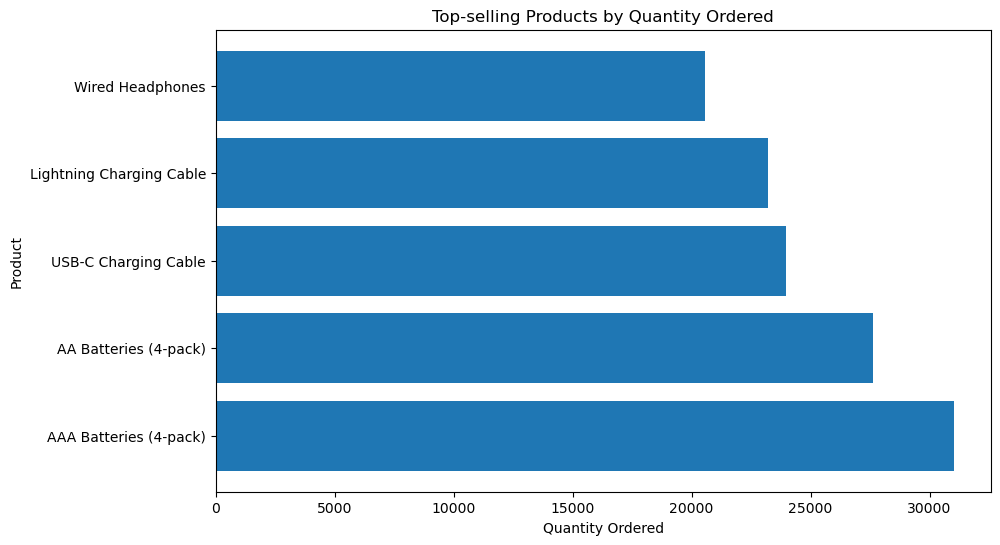

In [83]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(top_selling_products.index, top_selling_products['quantity_ordered'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Top-selling Products by Quantity Ordered')
plt.show()


## 2. Which month had the highest sales and which had the lowest sales?

In [84]:
sales_by_month = df_modified.groupby('month').agg({'sales': 'sum'})
highest_sales_month = sales_by_month['sales'].idxmax()
lowest_sales_month = sales_by_month['sales'].idxmin()


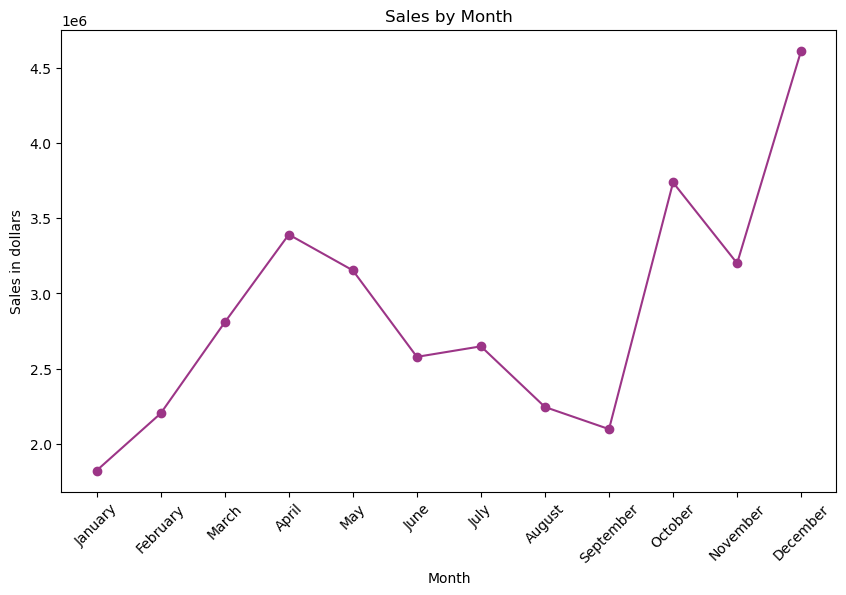

In [85]:
import calendar
month_names = [calendar.month_name[i] for i in sales_by_month.index]

plt.figure(figsize=(10, 6))
plt.plot(month_names, sales_by_month['sales'], marker='o', color='#9C3587')
plt.xlabel('Month')
plt.ylabel('Sales in dollars')
plt.title('Sales by Month')
plt.xticks(rotation=45)
plt.show()

### Answer

- The highest sales occurred in December, with a total of $4,613,443.34. 
This can be attributed to various factors, including the holiday season, increased consumer spending, and potential promotions or discounts during that time. December often sees a surge in sales across different industries, making it a crucial period for businesses.

- The month with the lowest sales is January, with a total of $1,822,256.73. This decline in sales can be expected following the peak holiday season in December, as consumer spending tends to decrease in January. Factors such as reduced disposable income after holiday expenses and a general decrease in purchasing activity can contribute to lower sales during this month.

## 3. What are the 3 top-selling products in each of the cities?

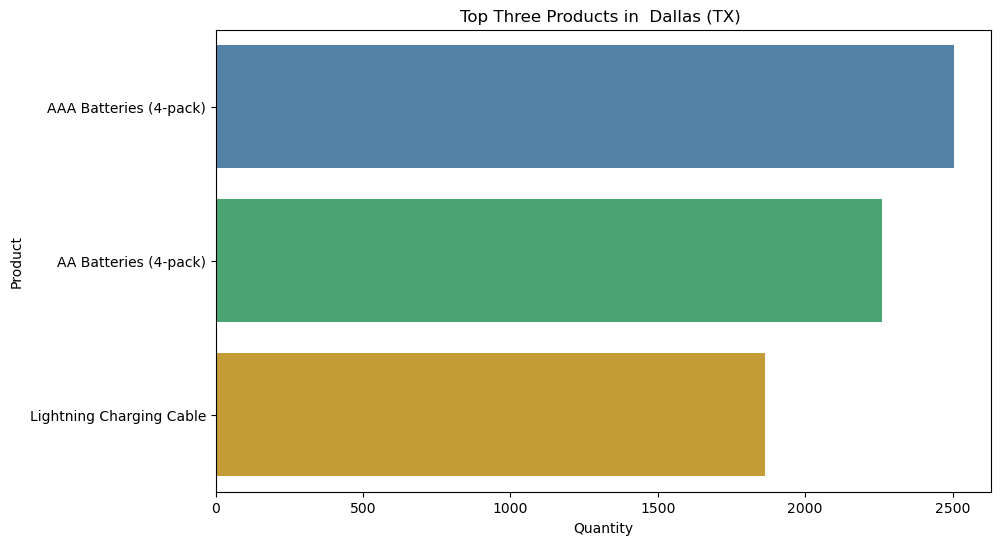

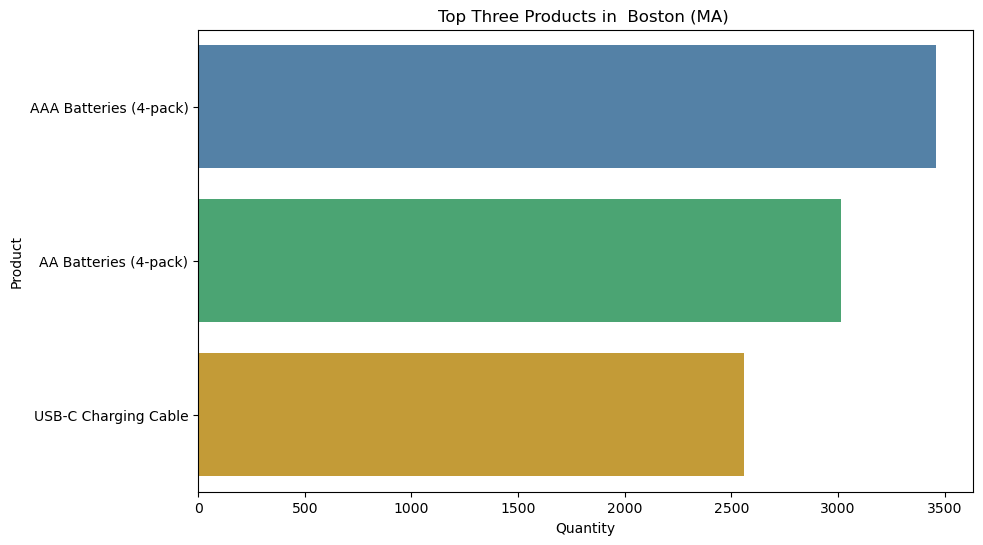

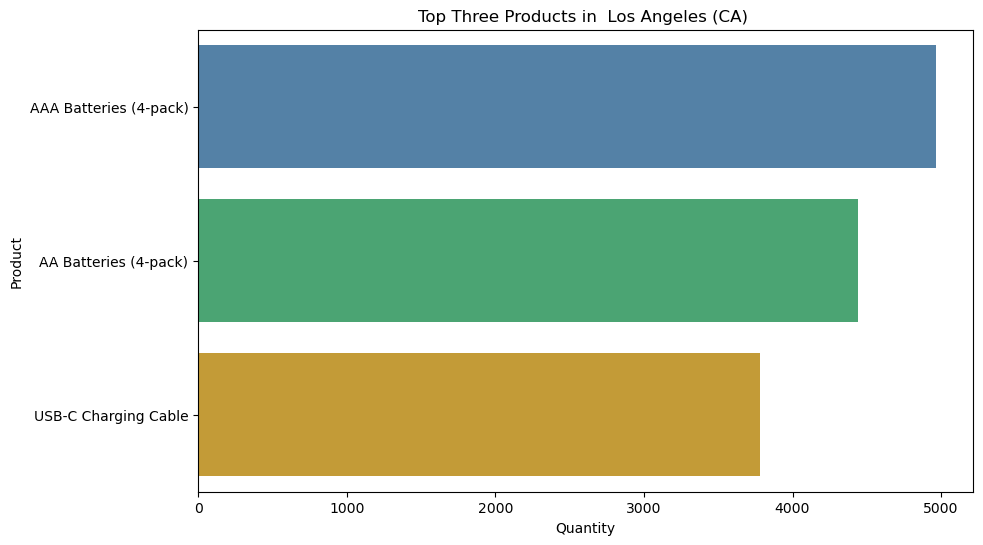

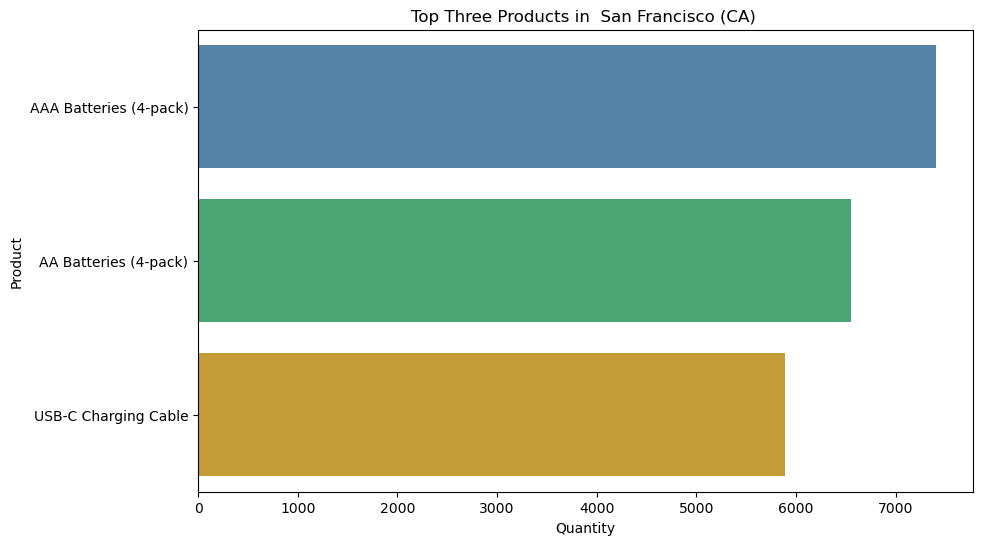

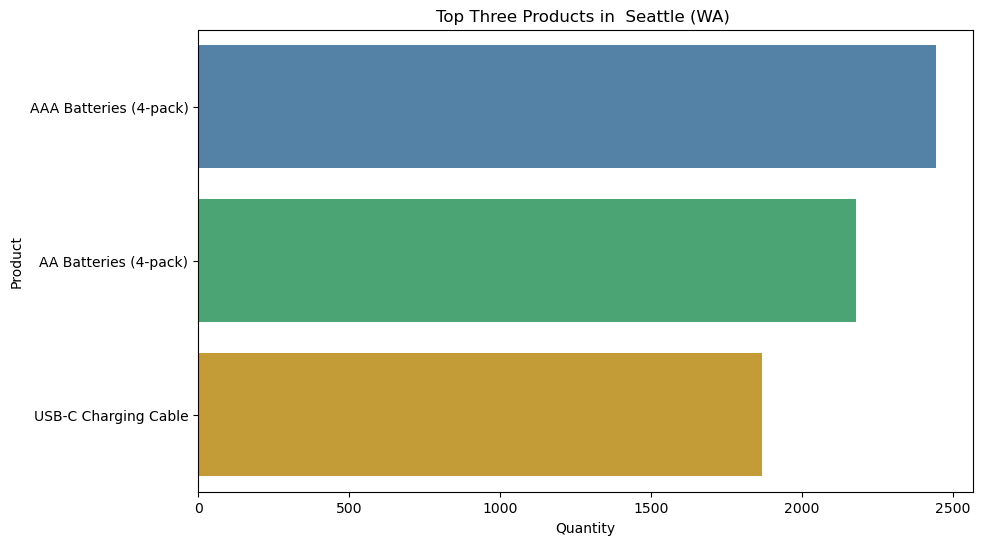

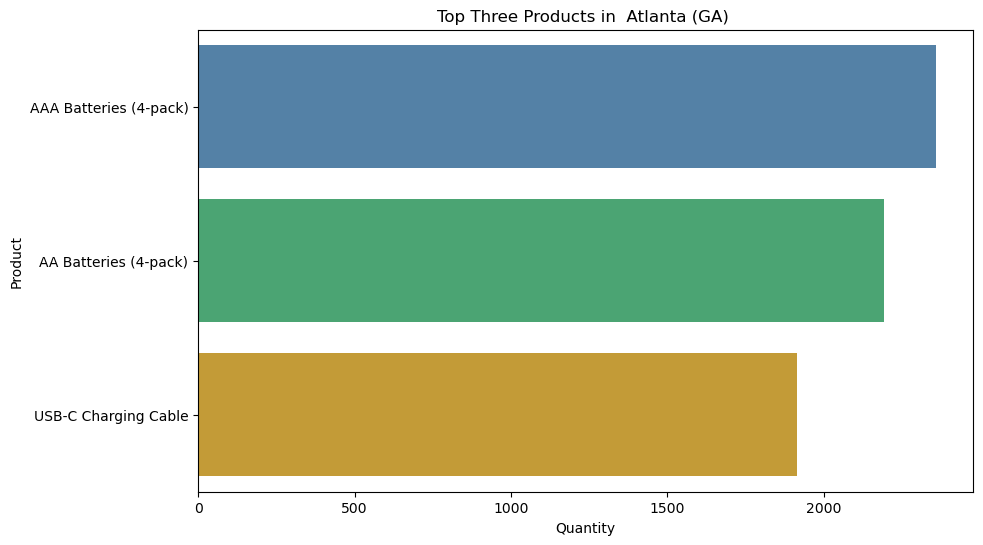

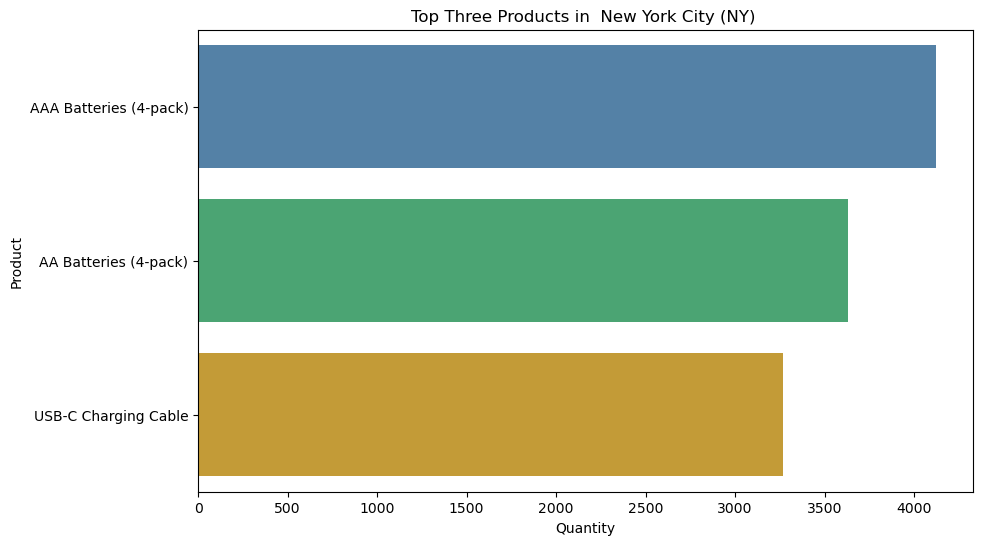

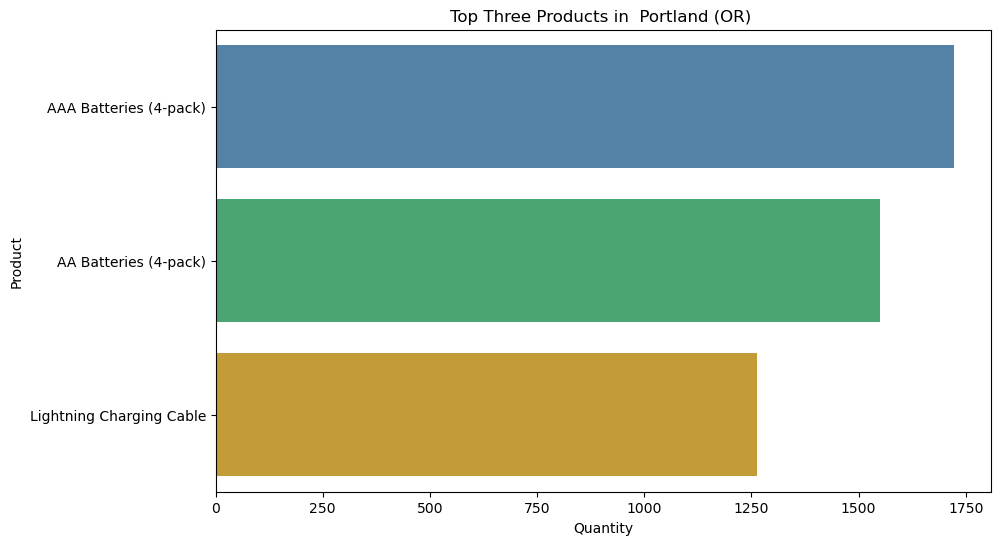

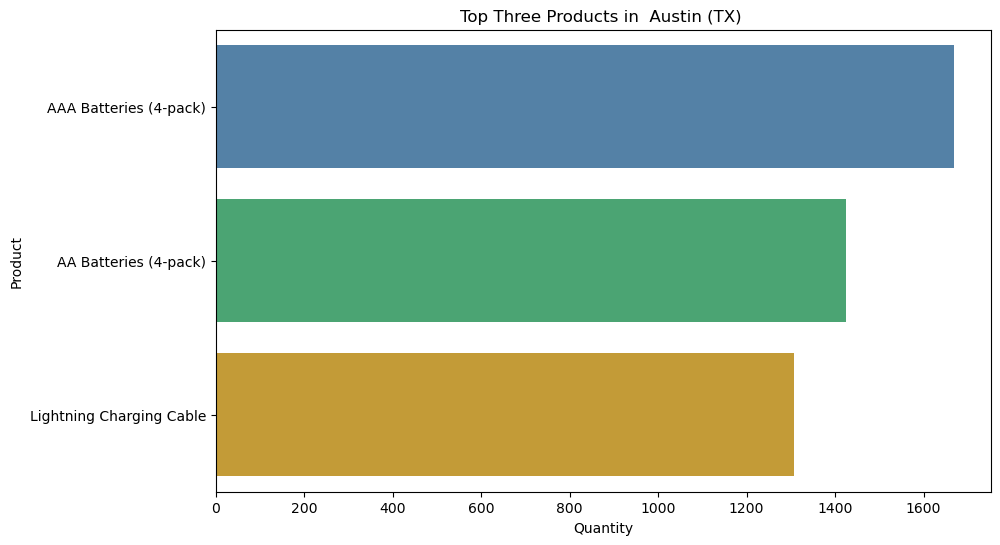

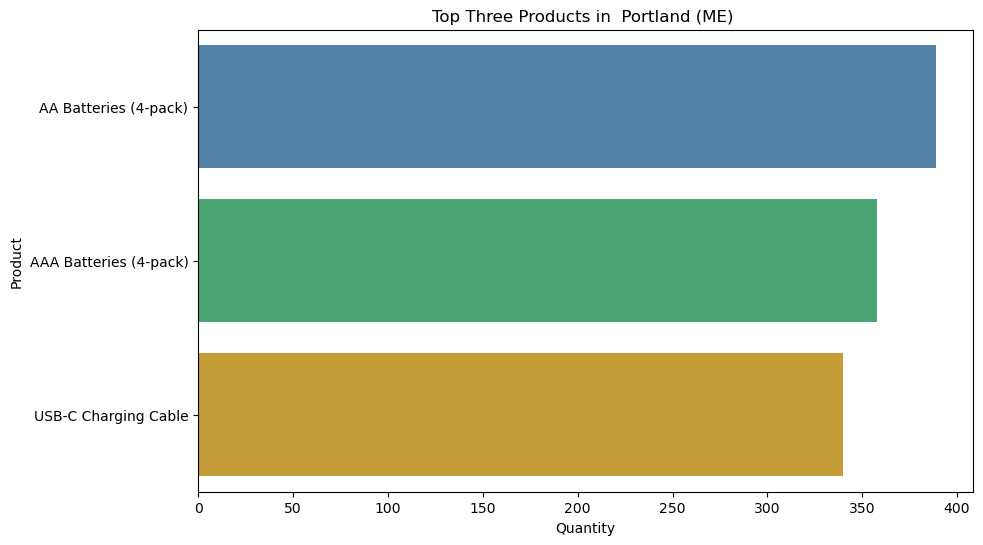

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_products(city_data, city_name):
    product_counts = city_data.groupby('product')['quantity_ordered'].sum().reset_index()
    top_products_city = product_counts.nlargest(3, 'quantity_ordered')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='quantity_ordered', y='product', data=top_products_city, palette=['steelblue', 'mediumseagreen', 'goldenrod'])
    plt.xlabel('Quantity')
    plt.ylabel('Product')
    plt.title(f'Top Three Products in {city_name}')
    plt.show()

# List of cities
cities = [' Dallas (TX) ', ' Boston (MA) ', ' Los Angeles (CA) ', ' San Francisco (CA) ',
          ' Seattle (WA) ', ' Atlanta (GA) ', ' New York City (NY) ', ' Portland (OR) ',
          ' Austin (TX) ', ' Portland (ME) ']

# Loop over the cities
for city in cities:
    city_data = df_modified[df_modified['city'] == city]
    plot_top_products(city_data, city)


### Answer:
The top-selling products in each city are identified. 
- Across the cities, AAA Batteries (4-pack) and AA Batteries (4-pack) consistently rank among the top three best-selling products. 
- USB-C Charging Cables and Lightning Charging Cables also appear in multiple cities' top three lists.

This suggests a high demand for batteries, which could be attributed to their universal usage across various devices. USB-C and Lightning Charging Cables are likely popular due to the widespread use of smartphones, tablets, and other electronics that require these cables.


## 4. Is there a noticeable difference in product prices during peak hours or specific days?

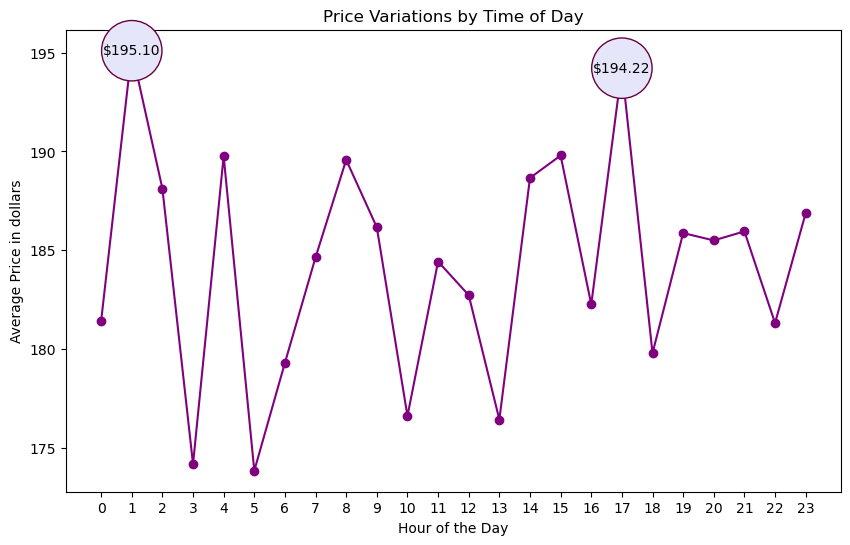

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data based on the time intervals
df_modified['hour_of_day'] = df_modified['time'].apply(lambda x: x.hour)  # Extract the hour of the day
price_grouped = df_modified.groupby('hour_of_day')['price_each'].mean()

# Visualize the average prices
plt.figure(figsize=(10, 6))
plt.plot(price_grouped.index, price_grouped.values, marker='o', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price in dollars')
plt.title('Price Variations by Time of Day')

# Set the x-axis ticks to display every hour
plt.xticks(range(24))

# Identify the two maximum points
max_points = price_grouped.nlargest(2)

# Annotate the two maximum points with smaller circle markers
for hour, price in max_points.iteritems():
    plt.annotate(f'${price:.2f}', xy=(hour, price), xytext=(hour, price),
                 ha='center', va='center', color='black',
                 bbox=dict(boxstyle='circle,pad=0.1', fc='#E6E6FA', ec='#66023C', lw=1))
    

plt.show()


### Answer:
There is a noticeable difference in product prices during peak hours. 

- Prices are relatively lower in the early morning (3 AM to 6 AM), increase slightly during the morning hours (7 AM to 10 AM), and remain stable during midday (11 AM to 2 PM). 
- Prices spike in the late afternoon (3 PM to 5 PM) and gradually decrease afterward. 

This suggests that peak hours, especially in the late afternoon, exhibit higher product prices, potentially due to increased demand. 

In [90]:
total_sales = df_modified['sales'].sum()
print('Total Sales:', total_sales)


Total Sales: 34492035.97


In [91]:
average_sales_per_transaction = df_modified['sales'].mean()
average_sales_per_month = df_modified.groupby('month')['sales'].mean()

print('Average Sales per Transaction:', average_sales_per_transaction)
print('Average Sales per Month:')
print(average_sales_per_month)


Average Sales per Transaction: 185.49091675146175
Average Sales per Month:
month
1     187.687376
2     183.884962
3     185.250471
4     185.495390
5     190.305852
6     190.187565
7     185.249826
8     187.648849
9     180.497387
10    184.238580
11    182.074956
12    184.655913
Name: sales, dtype: float64


## 5. What is the correlation between quantity ordered and sales revenue?

In [94]:

correlation = df_modified['quantity_ordered'].corr(df_modified['sales'])

print("Correlation between quantity ordered and sales revenue:", correlation)


Correlation between quantity ordered and sales revenue: -0.13941704155935714


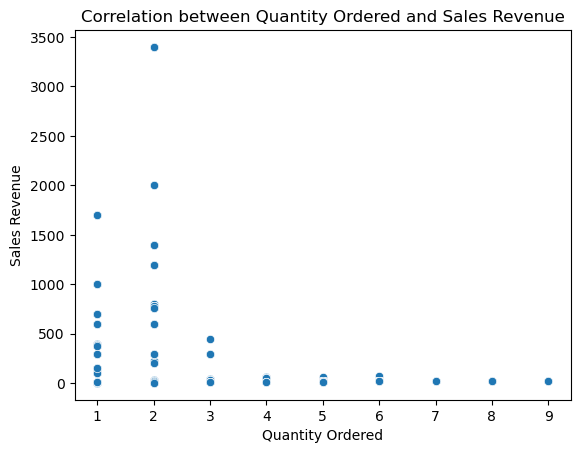

In [95]:

# Create a scatter plot
sns.scatterplot(data=df_modified, x='quantity_ordered', y='sales')
plt.title('Correlation between Quantity Ordered and Sales Revenue')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales Revenue')
plt.show()


### Answer:

The correlation coefficient between the quantity ordered and sales revenue is -0.1394. This indicates a weak negative correlation between these variables. In other words, as the quantity ordered increases, there is a slight tendency for the sales revenue to decrease. However, it is important to note that the correlation is relatively weak, suggesting that other factors may have a stronger influence on sales revenue.

## 6. How does the Price of Each Item and the Quantity Ordered Influence Sales?

In [92]:
import statsmodels.api as sm

X = df_modified[['price_each', 'quantity_ordered']]
y = df_modified['sales']

X = sm.add_constant(X)  # Add a constant term to the regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.126e+07
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:49:53   Log-Likelihood:            -7.4024e+05
No. Observations:              185950   AIC:                         1.480e+06
Df Residuals:                  185947   BIC:                         1.481e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.6628      0.087  

### Answer

OLS regression analysis:
The coefficients in the output indicate the estimated impact of the independent variables (price_each and quantity_ordered) on the dependent variable (sales). 

- Price_each Coefficient: The coefficient for price_each is approximately 1.0011, indicating that, on average, a one-unit increase in price_each is associated with a 1.0011 unit increase in sales, holding all other variables constant.

- Quantity_ordered Coefficient: The coefficient for quantity_ordered is approximately 6.7168, suggesting that, on average, a one-unit increase in quantity_ordered is associated with a 6.7168 unit increase in sales, holding all other variables constant.

- R-squared: The R-squared value of 0.998 indicates that the model explains 99.8% of the variance in the sales data, suggesting a strong relationship between price, quantity, and sales.

- F-statistic: The high F-statistic value of 6.126e+07 indicates that the overall regression model is statistically significant, implying that at least one of the independent variables is significantly related to the dependent variable.

Based on these results, we can conclude that both price and quantity have a significant impact on sales. Higher prices and larger quantities ordered are associated with higher sales. These findings can provide insights for pricing strategies and inventory management to optimize sales performance in the business.

## Price elasticity

In [93]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

X = df_modified['price_each']
y = df_modified['quantity_ordered']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

intercept = results.params[0]
slope = results.params[1]

price_elasticity = slope * (df_modified['price_each'] / df_modified['quantity_ordered'])
elasticity_df = pd.DataFrame(price_elasticity, columns=['Price Elasticity'])

def display_table(page):
    start_idx = page * 10
    end_idx = (page + 1) * 10
    display(elasticity_df[start_idx:end_idx])

total_pages = len(elasticity_df) // 10
page_buttons = [widgets.Button(description=str(page + 1)) for page in range(total_pages)]

def on_button_clicked(b):
    page = int(b.description) - 1
    display_table(page)

display_table(0)
button_container = widgets.HBox(page_buttons)
display(button_container)

for button in page_buttons:
    button.on_click(on_button_clicked)



,Price Elasticity
0,-0.001179
1,-0.019730
2,-0.118391
3,-0.002366
4,-0.002366
5,-0.002358
6,-0.019730
7,-0.002358
8,-0.335441
9,-0.002366


### Answer
The price elasticity values indicate the responsiveness of the quantity ordered to changes in price. 

- For example, a price elasticity value of -0.019730 suggests that a 1% increase in price leads to a decrease of approximately 0.019730% in quantity ordered. This relatively small magnitude indicates that customers are not highly sensitive to price changes for this product.

- Additionally, the other elasticity values ranging from -0.118391 to -0.002358 further support the notion that changes in price have a limited impact on the quantity ordered.

In conclusion, the low price elasticity suggests that factors other than price, such as product quality, brand loyalty, or specific customer needs, may have a more significant influence on the purchasing decisions of customers for this product. 